In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df = pd.read_csv("/Users/yeomsangyoon/Visual Studio/0_tensor/source/car_evaluation.csv", header=None, names= col_names)
df

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [3]:
df.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'], dtype='object')

Buying label count:
buying
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64 



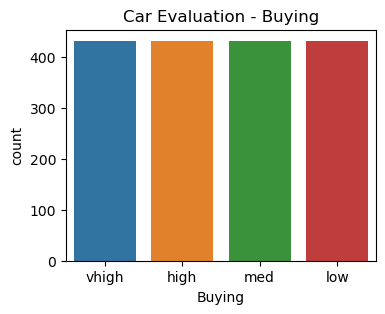

Buying Subject Count: 4



In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
#-----------------------------------------------------
# buying 레이블 개수 확인 (숫자)
print("Buying label count:")
print(df['buying'].value_counts(), "\n")
# buying 레이블 개수 확인 (그래프)
plt.figure(figsize=(4, 3))
sns.countplot(data=df, x="buying")
plt.xlabel("Buying")
plt.title("Car Evaluation - Buying")
plt.show()
# buying subject 개수 확인
buying_subject_count = df['buying'].nunique()
print("Buying Subject Count:", buying_subject_count)
print()

Maint label count:
maint
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64 



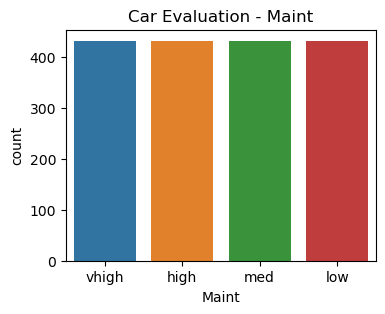

Maint Subject Count: 4


In [5]:
# maint 레이블 개수 확인 (숫자)
print("Maint label count:")
print(df['maint'].value_counts(), "\n")
# maint 레이블 개수 확인 (그래프)
plt.figure(figsize=(4, 3))
sns.countplot(data=df, x="maint")
plt.xlabel("Maint")
plt.title("Car Evaluation - Maint")
plt.show()
# maint subject 개수 확인
maint_subject_count = df['maint'].nunique()
print("Maint Subject Count:", maint_subject_count)

doors label count:
doors
2        432
3        432
4        432
5more    432
Name: count, dtype: int64 



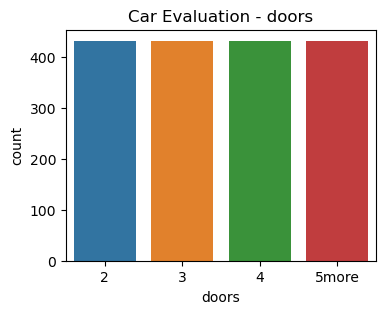

doors Subject Count: 4


In [6]:
# doors 레이블 개수 확인 (숫자)
print("doors label count:")
print(df['doors'].value_counts(), "\n")
# doors 레이블 개수 확인 (그래프)
plt.figure(figsize=(4, 3))
sns.countplot(data=df, x="doors")
plt.xlabel("doors")
plt.title("Car Evaluation - doors")
plt.show()
# doors subject 개수 확인
doors_subject_count = df['doors'].nunique()
print("doors Subject Count:", doors_subject_count)

persons label count:
persons
2       576
4       576
more    576
Name: count, dtype: int64 



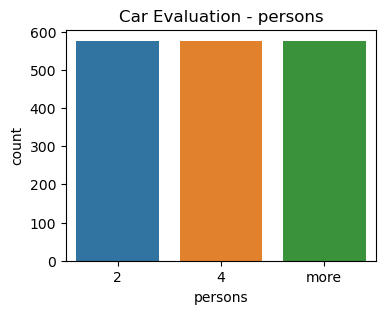

persons Subject Count: 3


In [7]:
# persons 레이블 개수 확인 (숫자)
print("persons label count:")
print(df['persons'].value_counts(), "\n")
# persons 레이블 개수 확인 (그래프)
plt.figure(figsize=(4, 3))
sns.countplot(data=df, x="persons")
plt.xlabel("persons")
plt.title("Car Evaluation - persons")
plt.show()
# persons subject 개수 확인
persons_subject_count = df['persons'].nunique()
print("persons Subject Count:", persons_subject_count)

lug_boot label count:
lug_boot
small    576
med      576
big      576
Name: count, dtype: int64 



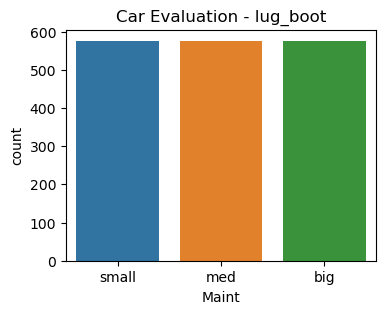

lug_boot Subject Count: 4


In [8]:
# lug_boot 레이블 개수 확인 (숫자)
print("lug_boot label count:")
print(df['lug_boot'].value_counts(), "\n")
# lug_boot 레이블 개수 확인 (그래프)
plt.figure(figsize=(4, 3))
sns.countplot(data=df, x="lug_boot")
plt.xlabel("Maint")
plt.title("Car Evaluation - lug_boot")
plt.show()
# lug_boot subject 개수 확인
lug_boot_subject_count = df['maint'].nunique()
print("lug_boot Subject Count:", lug_boot_subject_count)

safety label count:
safety
low     576
med     576
high    576
Name: count, dtype: int64 



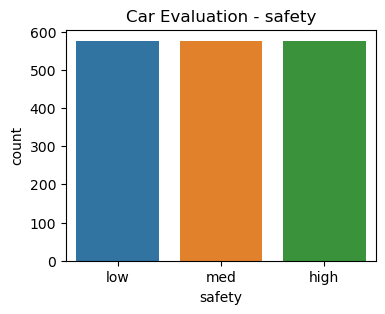

safety Subject Count: 3


In [9]:
# safety 레이블 개수 확인 (숫자)
print("safety label count:")
print(df['safety'].value_counts(), "\n")
# safety 레이블 개수 확인 (그래프)
plt.figure(figsize=(4, 3))
sns.countplot(data=df, x="safety")
plt.xlabel("safety")
plt.title("Car Evaluation - safety")
plt.show()
# safety subject 개수 확인
safety_subject_count = df['safety'].nunique()
print("safety Subject Count:", safety_subject_count)

class label count:
class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64 



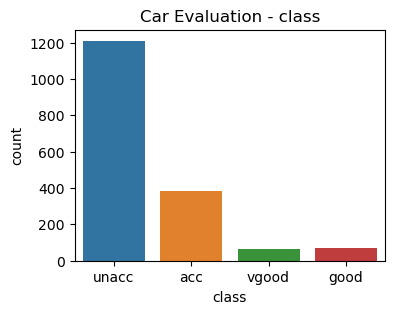

class Subject Count: 4


In [10]:
# class 레이블 개수 확인 (숫자)
print("class label count:")
print(df['class'].value_counts(), "\n")
# class 레이블 개수 확인 (그래프)
plt.figure(figsize=(4, 3))
sns.countplot(data=df, x="class")
plt.xlabel("class")
plt.title("Car Evaluation - class")
plt.show()
# class subject 개수 확인
class_subject_count = df['class'].nunique()
print("class Subject Count:", class_subject_count)

In [11]:
# 라벨 인코딩 (문자형 데이터로 라벨링이 되어 있는 컬럼 데이터들 라벨링 필요.)
# Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'], dtype='object')

In [12]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# LabelEncoder 객체 생성
label = LabelEncoder()

#LabelEncoder를 적용하여 변환
df['buying'] = label.fit_transform(df['buying'])
df['maint'] = label.fit_transform(df['maint'])
df['doors'] = label.fit_transform(df['doors'])
df['persons'] = label.fit_transform(df['persons'])
df['lug_boot'] = label.fit_transform(df['lug_boot'])
df['safety'] = label.fit_transform(df['safety'])
df['class'] = label.fit_transform(df['class'])

df

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2
...,...,...,...,...,...,...,...
1723,1,1,3,2,1,2,1
1724,1,1,3,2,1,0,3
1725,1,1,3,2,0,1,2
1726,1,1,3,2,0,2,1


Text(0.5, 1.0, 'Car_Evaluation')

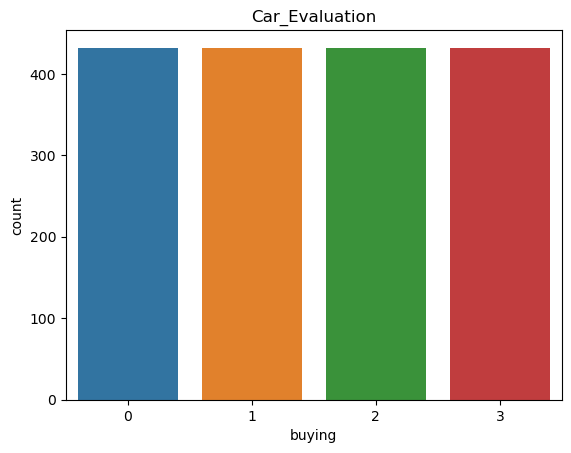

In [13]:
# 라벨링 결과 확인
# sub_id 레이블 개수 확인 (그래프)
sns.countplot(data = df, x="buying")
plt.xlabel("buying")
plt.title("Car_Evaluation")

Text(0.5, 1.0, 'Car_Evaluation')

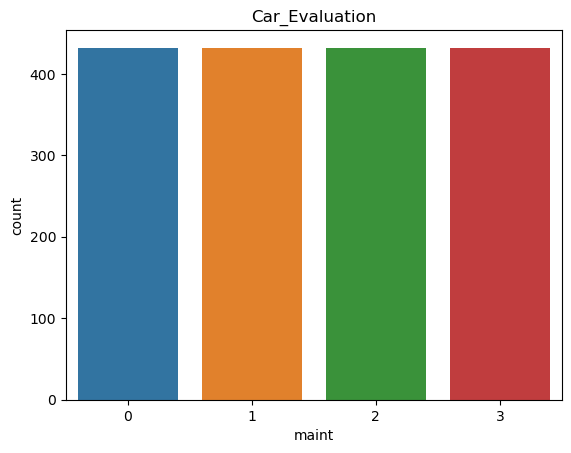

In [14]:
# 라벨링 결과 확인
# maint 레이블 개수 확인 (그래프)
sns.countplot(data = df, x="maint")
plt.xlabel("maint")
plt.title("Car_Evaluation")

Text(0.5, 1.0, 'Car_Evaluation')

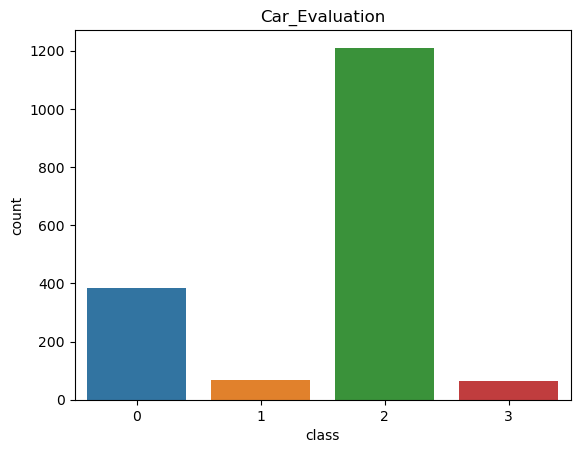

In [15]:
# 라벨링 결과 확인
# class 레이블 개수 확인 (그래프)
sns.countplot(data = df, x="class")
plt.xlabel("class")
plt.title("Car_Evaluation")

In [16]:
# 결측치 확인
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [17]:
# 결측치 제거
df = df.dropna()
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [18]:
# X,y 분류

In [19]:
from sklearn.model_selection import train_test_split

X = df.drop('buying',axis=1)
X = df.drop('class',axis=1)
print(X.head())

y = df['class']
print(y.value_counts())

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=0)

   buying  maint  doors  persons  lug_boot  safety
0       3      3      0        0         2       1
1       3      3      0        0         2       2
2       3      3      0        0         2       0
3       3      3      0        0         1       1
4       3      3      0        0         1       2
class
2    1210
0     384
1      69
3      65
Name: count, dtype: int64


In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [21]:
#로지스틱

In [22]:
import warnings
warnings.filterwarnings('ignore')

clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)

print ("\n--- Logistic Regression Classifier ---", "\n")
print ("Accuracy Score : ", accuracy_score(y_test, pred_lr),"\n")
print (confusion_matrix(y_test, pred_lr),"\n")


#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,pred_lr))


--- Logistic Regression Classifier --- 

Accuracy Score :  0.6550925925925926 

[[ 11   0  84   4]
 [  1   0  20   0]
 [ 24   0 269   3]
 [  4   0   9   3]] 

              precision    recall  f1-score   support

           0       0.28      0.11      0.16        99
           1       0.00      0.00      0.00        21
           2       0.70      0.91      0.79       296
           3       0.30      0.19      0.23        16

    accuracy                           0.66       432
   macro avg       0.32      0.30      0.30       432
weighted avg       0.56      0.66      0.59       432



In [23]:
#decision tree

In [24]:
import warnings
warnings.filterwarnings('ignore')

clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

print ("\n--- Decision Tree Classifier ---", "\n")
print ("Accuracy Score : ", accuracy_score(y_test, pred_dt),"\n")
print (confusion_matrix(y_test, pred_dt),"\n")

#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,pred_dt))


--- Decision Tree Classifier --- 

Accuracy Score :  0.9768518518518519 

[[ 92   4   3   0]
 [  0  21   0   0]
 [  2   0 294   0]
 [  1   0   0  15]] 

              precision    recall  f1-score   support

           0       0.97      0.93      0.95        99
           1       0.84      1.00      0.91        21
           2       0.99      0.99      0.99       296
           3       1.00      0.94      0.97        16

    accuracy                           0.98       432
   macro avg       0.95      0.97      0.96       432
weighted avg       0.98      0.98      0.98       432



In [25]:
#random forest

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

print ("\n--- Radom Forest ---", "\n")
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred_dt = rf_clf.predict(X_test)
print ("Accuracy Score : ", accuracy_score(y_test, pred_dt),"\n")
print (confusion_matrix(y_test, pred_dt),"\n")

#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,pred_dt))


--- Radom Forest --- 

Accuracy Score :  0.9745370370370371 

[[ 95   3   1   0]
 [  2  19   0   0]
 [  3   0 293   0]
 [  2   0   0  14]] 

              precision    recall  f1-score   support

           0       0.93      0.96      0.95        99
           1       0.86      0.90      0.88        21
           2       1.00      0.99      0.99       296
           3       1.00      0.88      0.93        16

    accuracy                           0.97       432
   macro avg       0.95      0.93      0.94       432
weighted avg       0.98      0.97      0.97       432



In [27]:
# SVM Classifier

In [28]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

print("\n--- SVM Classifier ---", "\n")
clf_svm = SVC(random_state=0)
clf_svm.fit(X_train, y_train)
pred_dt = clf_svm.predict(X_test)
print ("Accuracy Score : ", accuracy_score(y_test, pred_dt),"\n")
print (confusion_matrix(y_test, pred_dt),"\n")

#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,pred_dt))


--- SVM Classifier --- 

Accuracy Score :  0.9212962962962963 

[[ 82   1  15   1]
 [  7  11   0   3]
 [  2   0 294   0]
 [  5   0   0  11]] 

              precision    recall  f1-score   support

           0       0.85      0.83      0.84        99
           1       0.92      0.52      0.67        21
           2       0.95      0.99      0.97       296
           3       0.73      0.69      0.71        16

    accuracy                           0.92       432
   macro avg       0.86      0.76      0.80       432
weighted avg       0.92      0.92      0.92       432



In [29]:
# 정규화 standard scaler

# # StandardScaler 객체 생성
# scaler = StandardScaler()

# # 특성 데이터를 표준화
# std_scaled_data = scaler.fit_transform(df)

# print(std_scaled_data)